Origine del File CSV: KAGGLE:
https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data?resource=download

In [907]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [908]:
# Carica il file CSV
file_path = "Sale Report.csv"  # Percorso del file
df = pd.read_csv(file_path)

In [909]:
# Visualizza le prime righe
print(df.head())

   index       SKU Code Design No.  Stock       Category Size Color
0      0    AN201-RED-L      AN201    5.0  AN : LEGGINGS    L   Red
1      1    AN201-RED-M      AN201    5.0  AN : LEGGINGS    M   Red
2      2    AN201-RED-S      AN201    3.0  AN : LEGGINGS    S   Red
3      3   AN201-RED-XL      AN201    6.0  AN : LEGGINGS   XL   Red
4      4  AN201-RED-XXL      AN201    3.0  AN : LEGGINGS  XXL   Red


In [910]:
#colonne
# SKU Code: Identificatore univoco per ciascun prodotto (Stringa).
# Design No.: Identificatore univoco per ciascun design (Stringa).
# Stock: Numero di articoli in magazzino (Intero).
# Category: Tipo di prodotto (Stringa).
# Size: Taglia del prodotto (Stringa).
# Color: Colore del prodotto (Stringa).

In [911]:
# Dimensione del dataset
print("Dimensioni del dataset:", df.shape)

Dimensioni del dataset: (9271, 7)


In [912]:
# Informazioni di base sul dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9271 entries, 0 to 9270
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       9271 non-null   int64  
 1   SKU Code    9188 non-null   object 
 2   Design No.  9235 non-null   object 
 3   Stock       9235 non-null   float64
 4   Category    9226 non-null   object 
 5   Size        9235 non-null   object 
 6   Color       9226 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 507.1+ KB
None


In [913]:
print("Righe con valori mancanti:", df.isnull().any(axis=1).sum())


Righe con valori mancanti: 83


In [914]:
# Controlla i valori nulli
print("\nValori nulli per colonna:")
print(df.isnull().sum())


Valori nulli per colonna:
index          0
SKU Code      83
Design No.    36
Stock         36
Category      45
Size          36
Color         45
dtype: int64


Elimino le righe contenenti valori null

In [915]:
df = df.dropna()
print("Nuove dimensioni del dataset:", df.shape)


Nuove dimensioni del dataset: (9188, 7)


In [916]:
# Statistiche descrittive
print("\nStatistiche descrittive:")
print(df.describe())


Statistiche descrittive:
             index        Stock
count  9188.000000  9188.000000
mean   4624.535916    26.378973
std    2665.639044    58.582786
min       0.000000     0.000000
25%    2315.750000     3.000000
50%    4628.500000     8.000000
75%    6932.250000    31.000000
max    9234.000000  1234.000000


Contare quante e quali categorie sono presenti

In [917]:
print(df["Category"].value_counts())


Category
KURTA                   3704
KURTA SET               1596
SET                     1049
TOP                      861
DRESS                    700
BLOUSE                   234
NIGHT WEAR               217
TUNIC                    154
SAREE                    147
AN : LEGGINGS            130
PALAZZO                   91
PANT                      91
CROP TOP                  42
SHARARA                   40
LEHENGA CHOLI             35
KURTI                     28
SKIRT                     20
BOTTOM                    19
CARDIGAN                  16
JUMPSUIT                   7
CROP TOP WITH PLAZZO       7
Name: count, dtype: int64


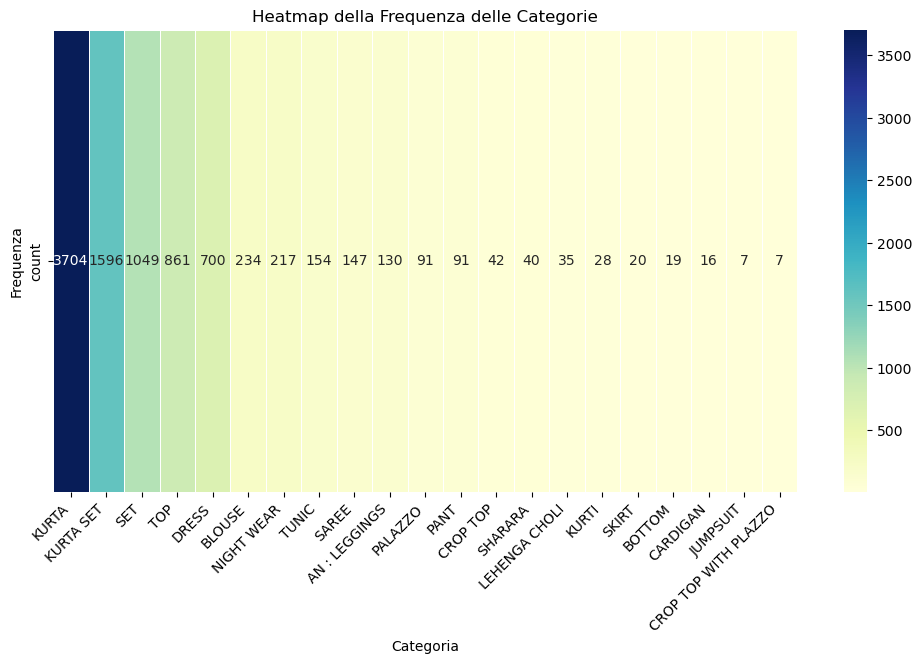

In [918]:
# conta le occorrenze di ciascuna categoria
categorie_count = df["Category"].value_counts()

categorie_df = categorie_count.to_frame().T  #per trasformare in una riga unica

# Crea la heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(categorie_df, annot=True, cmap='YlGnBu', cbar=True, fmt='d', linewidths=0.5)
plt.title('Heatmap della Frequenza delle Categorie')
plt.xlabel('Categoria')
plt.ylabel('Frequenza')
plt.xticks(rotation=45, ha='right')  #Ruota le etichette
plt.show()


Prodotti con più articoli in magazzino

In [919]:
print(df.sort_values(by="Stock", ascending=False).head(10)[["SKU Code", "Stock", "Category"]])


                      SKU Code   Stock   Category
3948            JNE3405-KR-XXL  1234.0      KURTA
3947             JNE3405-KR-XS  1230.0      KURTA
3300   JNE1525-KR-UDF19BLACK-M  1082.0      KURTA
3789           JNE3368-KR-XXXL   985.0      KURTA
3495        JNE2270-KR-487-XXL   949.0      KURTA
8301            SET273-KR-NP-M   880.0  KURTA SET
3299   JNE1525-KR-UDF19BLACK-L   874.0      KURTA
8302            SET273-KR-NP-S   871.0  KURTA SET
8304           SET273-KR-NP-XS   862.0  KURTA SET
3302  JNE1525-KR-UDF19BLACK-XL   844.0      KURTA


Distribuzione delle taglie disponibili

In [920]:
print(df["Size"].value_counts())

Size
S       1351
M       1341
XL      1339
XXL     1337
L       1335
XS      1110
XXXL    1066
FREE     216
5XL       32
4XL       31
6XL       30
Name: count, dtype: int64


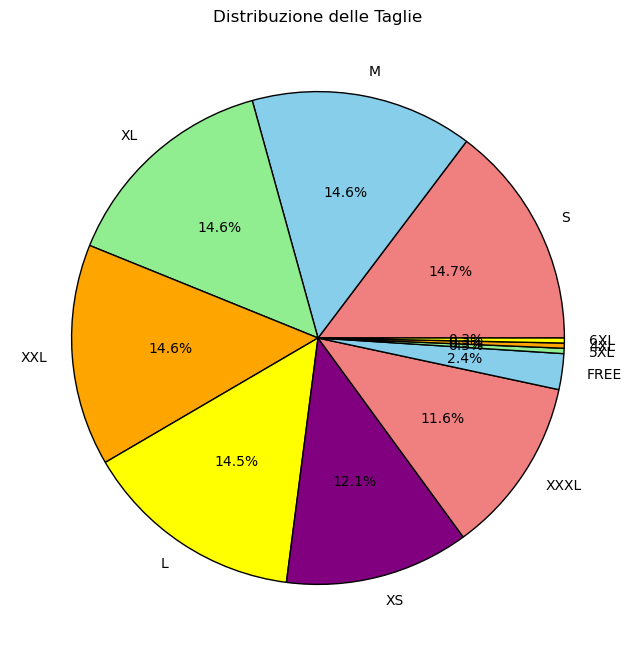

In [921]:
#Conta quante e quali taglie sono presenti
taglie_count = df["Size"].value_counts()

#crea il grafico a torta
plt.figure(figsize=(8, 8))
taglie_count.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'skyblue', 'lightgreen', 'orange', 'yellow', 'purple'], wedgeprops={'edgecolor': 'black'})
plt.title('Distribuzione delle Taglie')
plt.ylabel('')  #Rimuove l'etichetta del y
plt.show()


Distribuzione dei colori

In [922]:
#Rimuove le righe con il valore "NO REFERENCE"
df = df[df["Color"] != "NO REFERENCE"]

#Mostra tutti i colori
print(df["Color"].value_counts())


Color
Pink          777
Blue          777
Black         654
Green         640
Maroon        481
             ... 
MINT            7
CORAL           7
AQUA GREEN      5
Taupe           5
Chiku           1
Name: count, Length: 61, dtype: int64


In [923]:
print("Dimensioni del dataset:", df.shape) #nuova dimensione del dataset

Dimensioni del dataset: (9187, 7)


In [924]:
df.head()

,index,SKU Code,Design No.,Stock,Category,Size,Color
0,0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red
3,3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red
4,4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red


Quantità totale di stock per categoria

Category
KURTA                   114333.0
KURTA SET                47682.0
SET                      24643.0
TOP                      16608.0
DRESS                    11675.0
BLOUSE                    7925.0
PANT                      3436.0
NIGHT WEAR                3288.0
TUNIC                     2967.0
SAREE                     2761.0
KURTI                     1605.0
SHARARA                   1190.0
PALAZZO                    963.0
LEHENGA CHOLI              736.0
AN : LEGGINGS              715.0
SKIRT                      673.0
CROP TOP WITH PLAZZO       617.0
CROP TOP                   405.0
CARDIGAN                    58.0
BOTTOM                      41.0
JUMPSUIT                    33.0
Name: Stock, dtype: float64


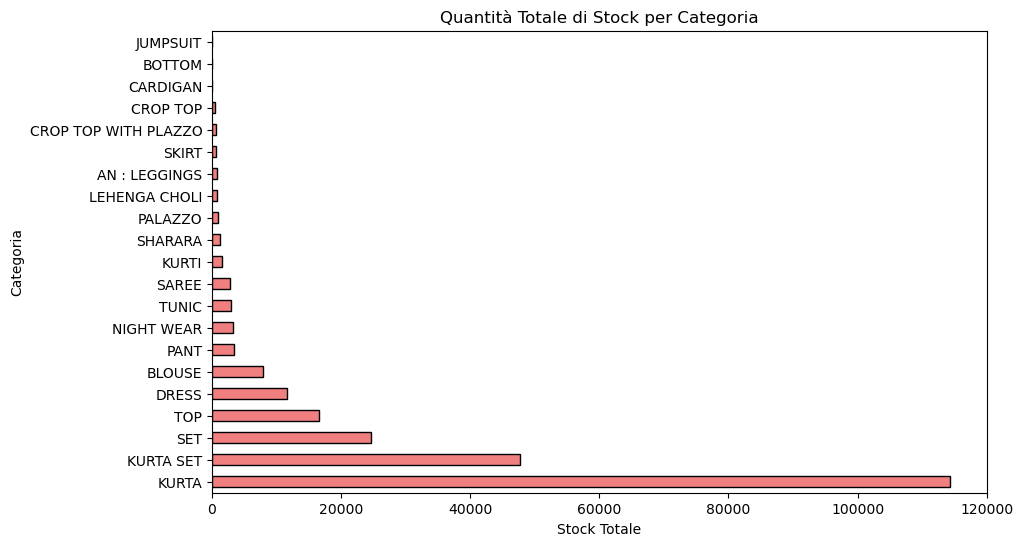

In [925]:
stock_per_categoria = df.groupby("Category")["Stock"].sum().sort_values(ascending=False)

print(stock_per_categoria)

#Crea un grafico a barre orizzontali
plt.figure(figsize=(10, 6))
stock_per_categoria.plot(kind='barh', color='lightcoral', edgecolor='black')
plt.title('Quantità Totale di Stock per Categoria')
plt.xlabel('Stock Totale')
plt.ylabel('Categoria')
plt.show()


Unità di ogni taglia presenti per ciascuna categoria

In [926]:
taglia_per_categoria = df.groupby(["Category", "Size"])["Stock"].sum().unstack().fillna(0)

#Ordinamento decrescente per ogni categoria in base al totale della taglia
taglia_per_categoria = taglia_per_categoria.sort_values(by='S', ascending=False)

display(taglia_per_categoria)

Size,4XL,5XL,6XL,FREE,L,M,S,XL,XS,XXL,XXXL
Category,,,,,,,,,,,
KURTA,897.0,993.0,1048.0,0.0,17278.0,17965.0,19283.0,16697.0,13500.0,16396.0,10276.0
KURTA SET,0.0,0.0,0.0,0.0,5749.0,7978.0,9887.0,5397.0,10239.0,4474.0,3958.0
SET,79.0,67.0,61.0,0.0,2951.0,3764.0,4175.0,3282.0,3821.0,3535.0,2908.0
TOP,0.0,0.0,0.0,0.0,2416.0,2804.0,2584.0,2412.0,2483.0,2248.0,1661.0
DRESS,0.0,0.0,0.0,0.0,1380.0,1649.0,2259.0,1436.0,2315.0,1372.0,1264.0
PANT,0.0,0.0,0.0,0.0,694.0,412.0,721.0,334.0,447.0,372.0,456.0
TUNIC,0.0,0.0,0.0,0.0,560.0,477.0,564.0,502.0,432.0,220.0,212.0
BLOUSE,0.0,0.0,0.0,5058.0,504.0,568.0,530.0,440.0,377.0,448.0,0.0
NIGHT WEAR,0.0,0.0,0.0,0.0,372.0,448.0,520.0,503.0,631.0,489.0,325.0


In [927]:
df.head()

,index,SKU Code,Design No.,Stock,Category,Size,Color
0,0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red
3,3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red
4,4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red


Conteggio dei colori per Categoria

In [928]:
#conta il numero di colori per ogni categoria
colori_per_categoria = df.groupby(["Category", "Color"]).size().unstack().fillna(0)

#Somma i valori per ogni categoria
top_5_categorie = colori_per_categoria.sum(axis=1).nlargest(5)

# Visualizza la tabella delle prime 5 categorie in ordine decrescente
display(colori_per_categoria.loc[top_5_categorie.index].sort_values(by=top_5_categorie.index[0], axis=1, ascending=False))


Color,Blue,Black,Pink,Green,Maroon,Grey,Teal,Navy Blue,Peach,Light Green,Yellow,Brown,Mustard,White,Red,Multicolor,Orange,Cream,Beige,Turquoise Blue,Sea Green,Wine,Magenta,Turquoise,TEAL GREEN,Dark Blue,Olive Green,Olive,Sky Blue,Dark Green,OFF WHITE,Rust,Light Blue,Indigo,Powder Blue,Purple,CORAL,Teal Green,Mauve,Lemon Yellow,Light Pink,Light Brown,NAVY,LEMON,Charcoal,Turquoise Green,Taupe,TEAL BLUE,AQUA GREEN,BURGUNDY,MINT,LIME GREEN,LIGHT YELLOW,LEMON,Khaki,Gold,Chiku,CORAL PINK,CORAL ORANGE,CORAL,MINT GREEN
Category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
KURTA,326.0,321.0,271.0,245.0,209.0,205.0,170.0,155.0,154.0,153.0,134.0,111.0,110.0,109.0,103.0,96.0,75.0,73.0,69.0,64.0,61.0,46.0,42.0,38.0,35.0,34.0,31.0,27.0,26.0,24.0,21.0,19.0,14.0,14.0,14.0,14.0,14.0,12.0,9.0,9.0,7.0,7.0,7.0,7.0,7.0,7.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KURTA SET,98.0,90.0,171.0,94.0,40.0,105.0,98.0,49.0,77.0,47.0,76.0,21.0,132.0,49.0,42.0,21.0,35.0,25.0,25.0,7.0,28.0,7.0,14.0,24.0,0.0,0.0,14.0,14.0,14.0,14.0,77.0,14.0,0.0,0.0,0.0,7.0,0.0,0.0,7.0,0.0,0.0,7.0,0.0,0.0,0.0,20.0,0.0,7.0,5.0,0.0,0.0,0.0,0.0,7.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0
SET,50.0,63.0,103.0,107.0,104.0,37.0,39.0,38.0,21.0,33.0,52.0,7.0,20.0,40.0,32.0,15.0,7.0,42.0,35.0,0.0,14.0,28.0,14.0,0.0,0.0,7.0,0.0,0.0,21.0,7.0,22.0,5.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,21.0,0.0,7.0,0.0,0.0,17.0,0.0,5.0,0.0,5.0,0.0,0.0,7.0,0.0,0.0,10.0,0.0,0.0,0.0,7.0,0.0
TOP,99.0,50.0,53.0,71.0,39.0,32.0,26.0,21.0,19.0,13.0,30.0,5.0,41.0,69.0,60.0,21.0,21.0,39.0,20.0,7.0,7.0,0.0,0.0,0.0,0.0,6.0,0.0,7.0,23.0,6.0,28.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0,7.0,7.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DRESS,100.0,21.0,55.0,47.0,7.0,7.0,18.0,14.0,42.0,28.0,28.0,5.0,28.0,36.0,28.0,21.0,21.0,19.0,5.0,7.0,21.0,6.0,0.0,7.0,0.0,0.0,0.0,7.0,18.0,0.0,41.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,7.0,7.0,0.0,11.0


Stock medio per taglia

In [929]:
df.head()

,index,SKU Code,Design No.,Stock,Category,Size,Color
0,0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red
3,3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red
4,4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red


Size
4XL     31.483871
5XL     33.125000
6XL     36.966667
FREE    36.367442
L       24.683895
M       27.712901
S       30.993338
XL      23.932786
XS      31.604505
XXL     22.949140
XXXL    20.255159
Name: Stock, dtype: float64

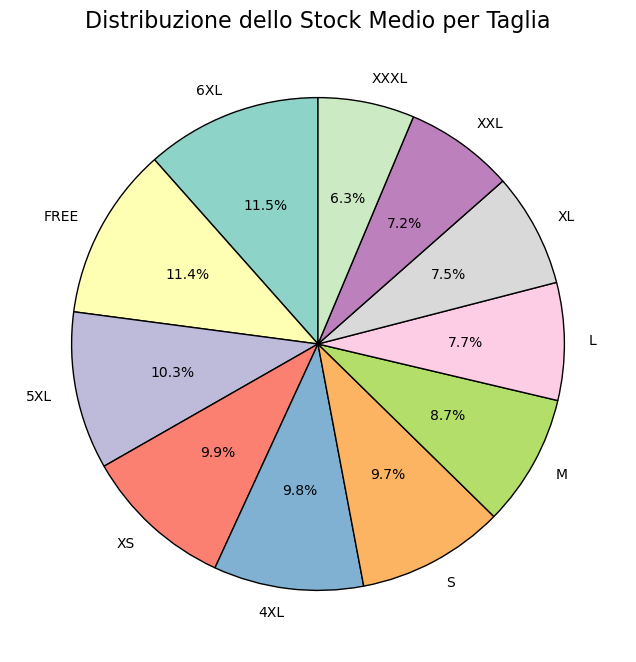

In [943]:
#Calcola lo stock medio per ciascuna taglia
stock_medio_per_taglia = df.groupby("Size")["Stock"].mean()

display(stock_medio_per_taglia)

#crea il grafico a torta
plt.figure(figsize=(8, 8))
stock_medio_per_taglia.sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("Set3", len(stock_medio_per_taglia)), startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Distribuzione dello Stock Medio per Taglia', fontsize=16)
plt.ylabel('')
plt.show()


Distribuzione dello stock per design

Design No.
JNE3405    4957.0
JNE1525    4808.0
SET273     3892.0
JNE3613    3421.0
JNE3368    3118.0
Name: Stock, dtype: float64

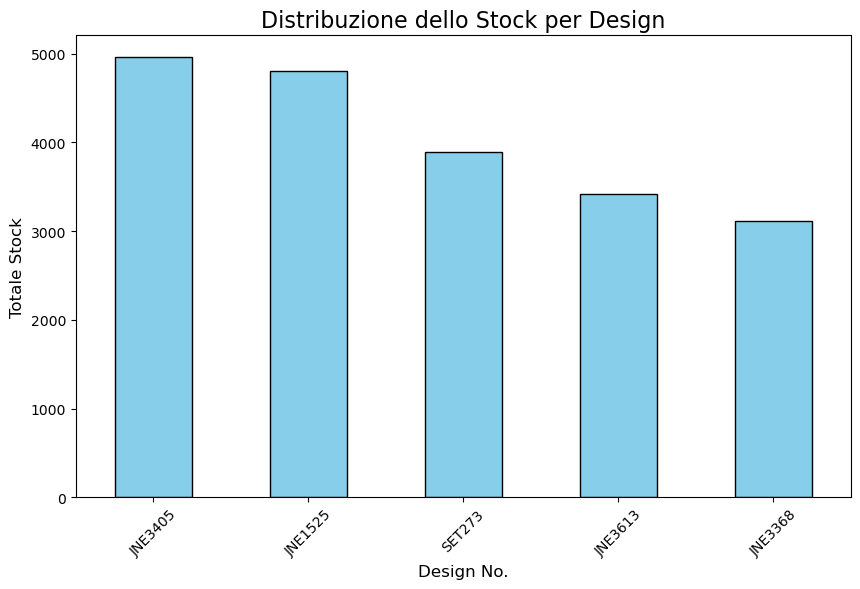

In [ ]:
#Calcolare il totale dello stock per ciascun design

#sommA dello stock per ciascun design
stock_per_design = df.groupby("Design No.")["Stock"].sum().sort_values(ascending=False)

top_designs = stock_per_design.head(5)
display(top_designs)

#Crea il grafico a barre verticali
plt.figure(figsize=(10, 6))
top_designs.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribuzione dello Stock per Design', fontsize=16)
plt.xlabel('Design No.', fontsize=12)
plt.ylabel('Totale Stock', fontsize=12)
plt.xticks(rotation=45)
plt.show()


Design col minor numeri di stock

In [947]:
#Calcola il totale dello stock per ciascun design
stock_per_design = df.groupby("Design No.")["Stock"].sum()

#ordina in ordine crescente per trovare i design più rari
valori_piccoli = stock_per_design.nsmallest(20) #nsmallest fa ottenere i valori piu piccoli

#Visualizza i design con meno stock
display(valori_piccoli)


Design No.
J0031      0.0
JAN8667    0.0
JAN8668    0.0
JNE3572    0.0
JNE3783    0.0
SAR031     0.0
SAR034     0.0
SAR063     0.0
SAR065     0.0
SAR066     0.0
SAR067     0.0
SAR079     0.0
SAR081     0.0
SAR088     0.0
SAR132     0.0
SAR167     0.0
SET121     0.0
SET234     0.0
J0027      1.0
J0160      1.0
Name: Stock, dtype: float64

In [933]:
df.head()

,index,SKU Code,Design No.,Stock,Category,Size,Color
0,0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red
3,3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red
4,4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red


Calcolare la media dello stock su tutti i prodotti.

In [948]:
stock_media = df["Stock"].mean()
print(f"Stock medio: {stock_media:.2f}")

Stock medio: 26.38


Calcolare la media dello stock per ogni categoria

In [949]:
stock_media_categoria = df.groupby("Category")["Stock"].mean()
display(stock_media_categoria)


Category
AN : LEGGINGS            5.500000
BLOUSE                  33.867521
BOTTOM                   2.157895
CARDIGAN                 3.625000
CROP TOP                 9.642857
CROP TOP WITH PLAZZO    88.142857
DRESS                   16.678571
JUMPSUIT                 4.714286
KURTA                   30.867441
KURTA SET               29.875940
KURTI                   57.321429
LEHENGA CHOLI           21.028571
NIGHT WEAR              15.152074
PALAZZO                 10.582418
PANT                    37.758242
SAREE                   18.910959
SET                     23.491897
SHARARA                 29.750000
SKIRT                   33.650000
TOP                     19.289199
TUNIC                   19.266234
Name: Stock, dtype: float64

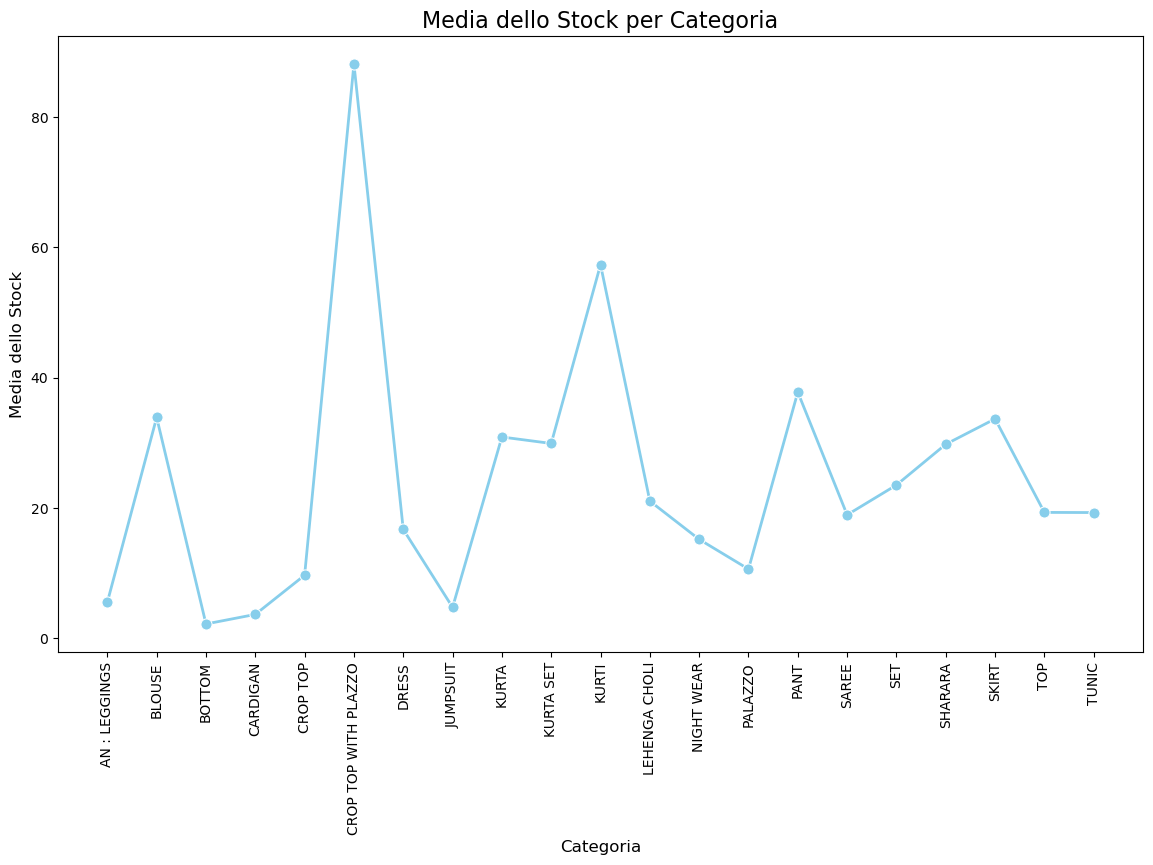

In [ ]:
plt.figure(figsize=(14, 8))

#traccia una linea per la media dello stock per categoria e aggiungi i punti
sns.lineplot(x=stock_media_categoria.index, y=stock_media_categoria.values, marker='o', color='skyblue', markersize=8, linewidth=2)

plt.title('Media dello Stock per Categoria', fontsize=16)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Media dello Stock', fontsize=12)

plt.xticks(rotation=90)

plt.show()


Calcolare la mediana per ciascuna categoria

In [937]:
#calcola la mediana dello stock per ogni categoria
mediana_stock_categoria = df.groupby('Category')['Stock'].median()

print(mediana_stock_categoria)


Category
AN : LEGGINGS            4.0
BLOUSE                  15.0
BOTTOM                   2.0
CARDIGAN                 3.0
CROP TOP                 5.0
CROP TOP WITH PLAZZO    77.0
DRESS                    4.0
JUMPSUIT                 4.0
KURTA                    9.0
KURTA SET                8.0
KURTI                   61.0
LEHENGA CHOLI           14.0
NIGHT WEAR               9.0
PALAZZO                  4.0
PANT                     7.0
SAREE                   10.0
SET                     12.0
SHARARA                 30.0
SKIRT                   33.5
TOP                      4.0
TUNIC                    6.0
Name: Stock, dtype: float64


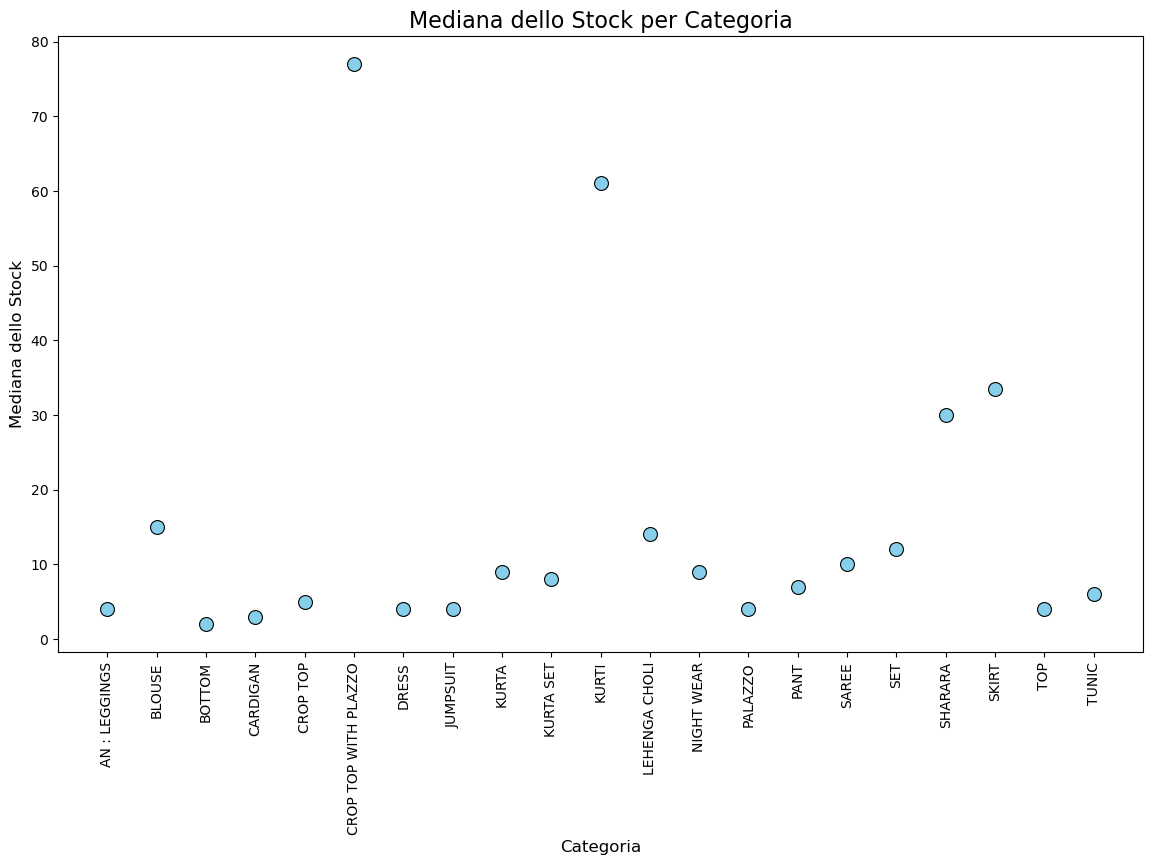

In [938]:
plt.figure(figsize=(14, 8))

#crea un grafico a dispersione (scatter plot)
sns.scatterplot(x=mediana_stock_categoria.index, y=mediana_stock_categoria.values, color='skyblue', s=100, edgecolor='black')

plt.title('Mediana dello Stock per Categoria', fontsize=16)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Mediana dello Stock', fontsize=12)

plt.xticks(rotation=90)

plt.show()


Distribuzione delle taglie per ogni colore

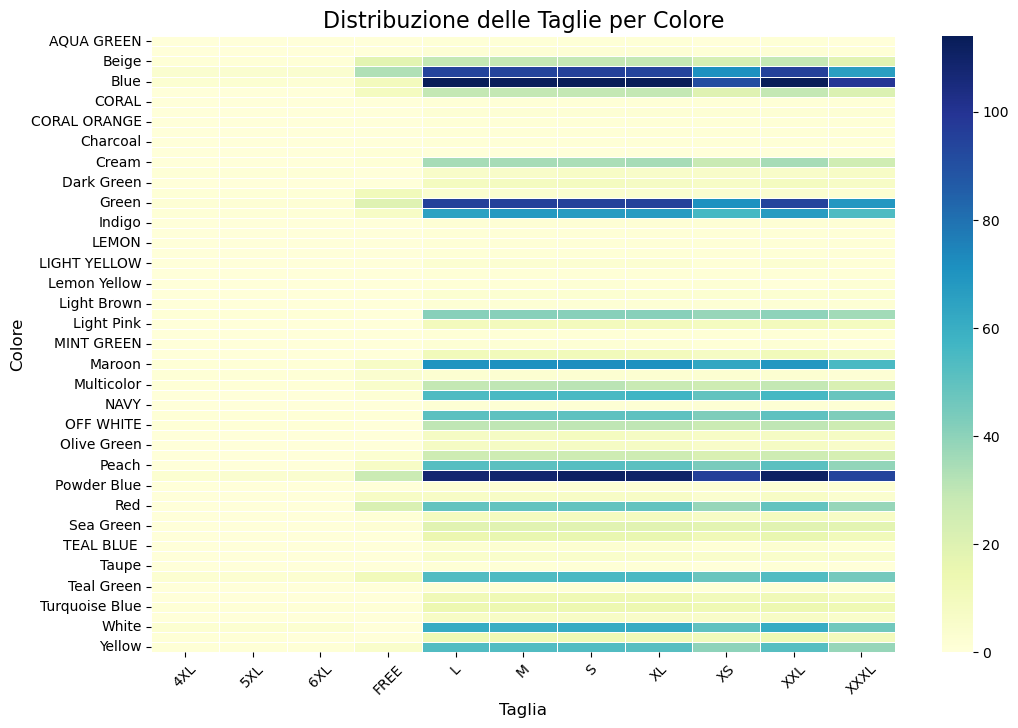

In [939]:
#Crea una tabella pivot con la distribuzione delle taglie per colore

heatmap_data = df.groupby(["Color", "Size"]).size().unstack().fillna(0)

# Crea la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', cbar=True, linewidths=0.5)
plt.title('Distribuzione delle Taglie per Colore', fontsize=16)
plt.xlabel('Taglia', fontsize=12)
plt.ylabel('Colore', fontsize=12)
plt.xticks(rotation=45)
plt.show()
